# Hotel Cancelations With Predictive Analytics


## Milestone 1: Data Selection and EDA

### Introduction

Hotel bookings are typically made well in advance of upcoming travel. Even if a hotel is fully booked, it will often show as having availability because the hotel expects that some reservations will be canceled before the check-in date. This maximizes the number of rooms that are occupied on any given day which, in turn, maximizes the revenue of the hotel. However, if a hotel oversells its rooms, guests will likely become angry, and the reputation of the hotel could be damaged. Therefore, hotels would be interested in a model that could predict the likelihood of a booking cancelation based on the booking's characteristics. Such a model could be used to maximize occupancy and minimize customer frustrations. Additionally, by predicting the occupancy in advance of a specific date, the hotel could ensure that resources such as staffing and supplies are allocated appropriately. This is important to a hotel because overstaffing and over-supplying would lead to waste, and understaffing and under-supplying would lead to poor customer reviews.

For this project, I will be analyzing a dataset from Kaggle that contains hotel bookings between 2015 and 2017 to predict whether a booking will be canceled by the customer in advance of the stay. The data can be found at this link: https://www.kaggle.com/datasets/khairullahhamsafar/hotels-booking-data-cleaned-version. While the dataset contains data from dozens of countries, it will be filtered to only include bookings at US hotels. A few key independent variables in the data are the lead time of the reservation, length of the reservation, and if the reservation required a deposit. These, along with a few others, will be used to predict the binary cancelation variable. A classification model will likely be used to predict if a booking will result in a cancelation.

### EDA

In [1]:
# Import the data
import pandas as pd
res_df = pd.read_csv('hotel_booking_data_cleaned.csv')

# Filter data to only include US bookings
res_df = res_df[(res_df.country == 'USA')]

# Show top few rows
res_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,05/07/2015
59,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,No Deposit,242.0,NaN,0,Transient,98.00,0,1,Check-Out,04/07/2015
65,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,NaN,0,Transient,153.00,1,0,Check-Out,05/07/2015
92,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,No Deposit,241.0,NaN,0,Transient,94.71,0,0,Check-Out,04/07/2015
162,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,No Deposit,241.0,NaN,0,Transient,117.81,1,2,Check-Out,10/07/2015


In [2]:
# Display the number of rows and columns
res_df.shape

(2097, 32)

In [3]:
# Create a new column for total number of nights reserved
res_df['nights_reserved'] = res_df.stays_in_weekend_nights + res_df.stays_in_week_nights

[Text(0.5, 0, 'Cancelation'),
 Text(0, 0.5, 'Average Lead Time'),
 Text(0.5, 1.0, 'Average Lead Time by Cancelation Status')]

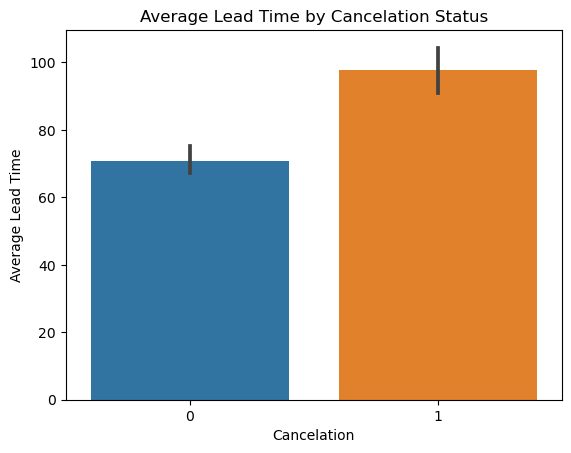

In [4]:
# Visual 1: Average Lead Time by Cancelation Status

import matplotlib.pyplot as plt
import seaborn as sns

p = sns.barplot(x=res_df.is_canceled, y=res_df.lead_time)
p.set(xlabel='Cancelation', ylabel='Average Lead Time', title='Average Lead Time by Cancelation Status')

The first visualization gives us an idea of how the average lead time of a reservation could influence whether or not it will be canceled. The plot indicates that the reservations which were canceled had a longer lead time. This makes intuitive sense as the longer a customer has to change his or her mind, the higher probability of a cancelation.

[Text(0.5, 0, 'Cancelation'),
 Text(0, 0.5, 'Number of Nights Reserved'),
 Text(0.5, 1.0, 'Average Number of Nights Reserved by Cancelation Status')]

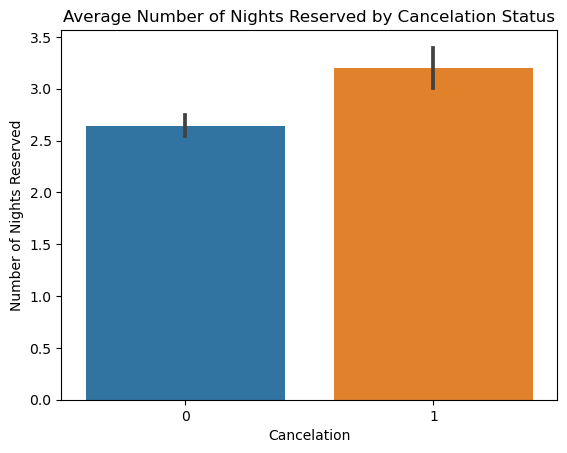

In [5]:
# Visual 2: Average Number of Nights Reserved by Cancelation Status

p = sns.barplot(x=res_df.is_canceled, y=res_df.nights_reserved)
p.set(xlabel='Cancelation', ylabel='Number of Nights Reserved', 
      title='Average Number of Nights Reserved by Cancelation Status')

The above plot shows the average number of nights reserved based on whether the reservation was canceled or not. As we can see, the reservations that were canceled had a longer length of stay reserved.

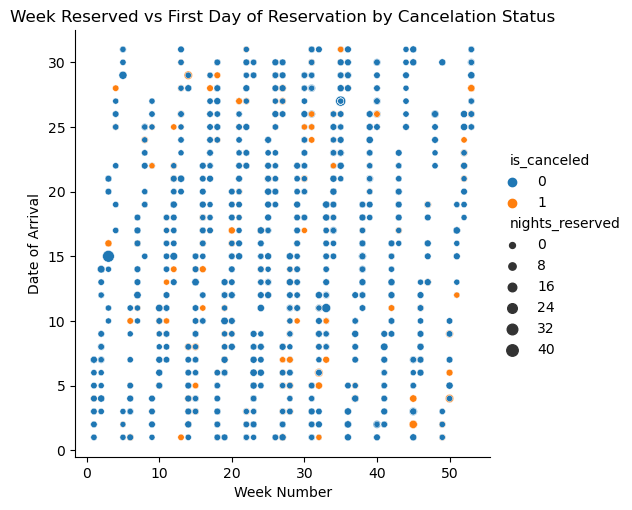

In [6]:
# Visual 3: Week Reserved vs First Day of Reservation by Cancelation Status

p = sns.relplot(x=res_df.arrival_date_week_number, y=res_df.arrival_date_day_of_month, 
            hue=res_df.is_canceled, size=res_df.nights_reserved)
p.set(xlabel='Week Number', ylabel='Date of Arrival', 
      title='Week Reserved vs First Day of Reservation by Cancelation Status')

The above plot shows the relationship between the month and day of a reservation and its cancelation status. There doesn't seem to be a discernable relationship between the date and whether or not a reservation was canceled. The cancelations look to be evenly scattered throughout the year.

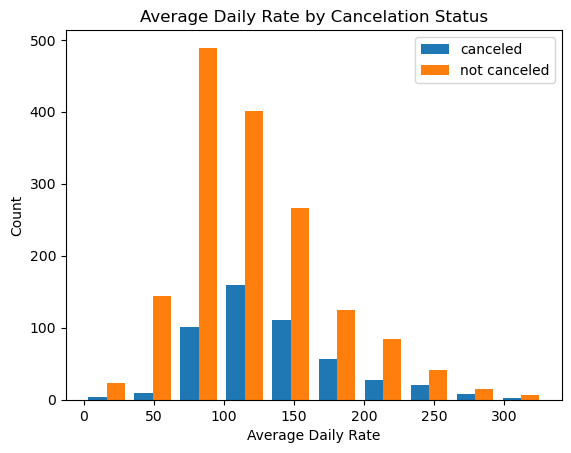

In [7]:
# Visual 4: Average Daily Rate by Cancelation Status

cancel_df = res_df[(res_df.is_canceled == 1)]
nc_df = res_df[(res_df.is_canceled == 0)]

fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Average Daily Rate')
ax.set_ylabel('Count')
ax.set_title('Average Daily Rate by Cancelation Status')
ax.hist((cancel_df.adr, nc_df.adr))
ax.legend(('canceled','not canceled'))

The above plot shows the distribution of the daily rate charge by the hotel for each reservation. It tells us that most reservations were between $100-$200, and that the reservations with the higher average daily rates were more likely to be canceled than those with lower average daily rates.

### Conclusion

The four plots above indicate that there are variables contained in this dataset that can be used to predict if a reservation will be canceled. From the initial visualizations, it appears that the average lead time of a reservation, the number of nights reserved, and the average daily rate all influence the cancelation status. These variables, as well as others, will be further analyzed to create a model which will predict if a reservation will be canceled.

## Milestone 2: Data Preparation

### Step 1: Feature Removal

In [8]:
# Remove the country column since all rows are USA data
res_df = res_df.drop('country', axis = 1)

# Remove the agent column since it is an ID column with no key
res_df = res_df.drop('agent', axis = 1)

# Remove the company column since it is an ID column with no key
res_df = res_df.drop('company', axis = 1)

# Remove the reservation_status column since that information is contained in other columns
res_df = res_df.drop('reservation_status', axis = 1)

# Remove the reservation_status_date column since it does not give information about the reservation
res_df = res_df.drop('reservation_status_date', axis = 1)

### Step 2: Handling Missing Data

In [9]:
# print the number of missing values by column
res_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
nights_reserved             

The remaining data does not have any missing values so nothing further is needed for this step.

### Step 3: Dummy Variable Creation

In [10]:
# convert categorical columns to dummy variables
res_df = pd.get_dummies(res_df)

# print the dimensions of the dataframe
res_df.shape

(2097, 72)

### Step 4: Split Into Training and Testing Sets

In [11]:
# split into features and target dataframes
features_df = res_df.loc[:, res_df.columns != 'is_canceled']
target_df = res_df['is_canceled']

In [12]:
# split the data into a training and test set
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features_df, target_df, 
                                                                            test_size = 0.2, random_state = 1)

## Milestone 3: Model Building and Evaluation

The following code will use GridSearch to determine the best model for the data. The models tested will be K-Nearest Neighbors, Logistic Regression, and Random Forest Classifier. 

In [13]:
# load libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [14]:
# Create a min-max scaler
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))

In [15]:
# Create a KNN classifier
knn = KNeighborsClassifier()

In [16]:
# Create a pipeline with the min-max scaler and KNN classifier
pipe = Pipeline([("standardizer", minmax_scale), ("classifier", knn)])

In [17]:
# fit the pipeline to the training set
pipe.fit(features_train, target_train)

Pipeline(steps=[('standardizer', MinMaxScaler()),
                ('classifier', KNeighborsClassifier())])

In [18]:
# create the search space
search_space =[{"classifier": [KNeighborsClassifier()],
                "classifier__n_neighbors": [1,2,3,4,5,6,7,8,9,10]},
               {"classifier": [LogisticRegression(max_iter=500, solver = 'liblinear')],
               "classifier__penalty": ['l1', 'l2'],
               "classifier__C": np.logspace(0,4,10)},
               {"classifier": [RandomForestClassifier()],
               "classifier__n_estimators": [10,100,1000],
               "classifier__max_features": [1,2,3,4,5,6,7,8,9,10]}]

In [19]:
# create a grid search
classifier = GridSearchCV(pipe, search_space, cv = 5, verbose = 0).fit(features_train, target_train)

In [20]:
# print the best model and estimators
print(classifier.best_estimator_)

Pipeline(steps=[('standardizer', MinMaxScaler()),
                ('classifier', RandomForestClassifier(max_features=10))])


From the results above, we can see that a Random Forest model with 10 features performed the best. Now we will fit that model to the data.

In [21]:
# apply a min-max scaler to the data
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
features_train_minmax = minmax_scale.fit_transform(features_train)

# apply a min-max scaler to the test features
features_test_minmax = minmax_scale.transform(features_test)

In [22]:
# create the Random Forest classifier
randomforest = RandomForestClassifier(max_features=10)

In [23]:
# train the model
model = randomforest.fit(features_train_minmax, target_train)

In [24]:
# import libaries needed for model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [25]:
# Make predictions
target_test_pred = model.predict(features_test_minmax)

In [26]:
# View accuracy score
accuracy_score(target_test, target_test_pred)

0.8380952380952381

In [27]:
# create confusion matrix for test data and predictions
c_matrix = confusion_matrix(target_test, target_test_pred)

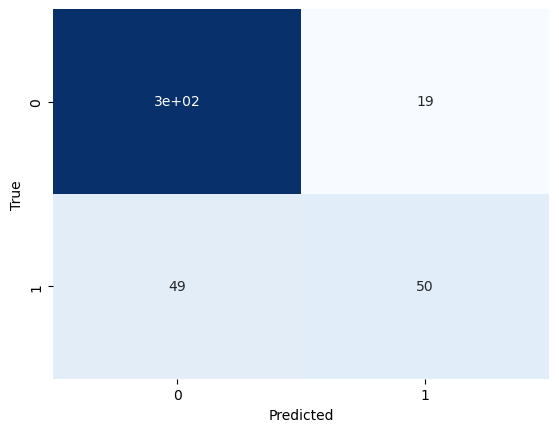

In [28]:
# create a dataframe from the confusion matrix
confusion_df = pd.DataFrame(c_matrix)

# create a heatmap
sns.heatmap(confusion_df, annot = True, cbar = None, cmap = "Blues")
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

In [30]:
# NEW ADDITION AFTER MILESTONE 3
# compute precision, recall, and f1 score
from sklearn.metrics import classification_report
print(classification_report(target_test, target_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       321
           1       0.72      0.51      0.60        99

    accuracy                           0.84       420
   macro avg       0.79      0.72      0.75       420
weighted avg       0.83      0.84      0.83       420



Text(0.5, 0, 'Random Forest Feature Importance')

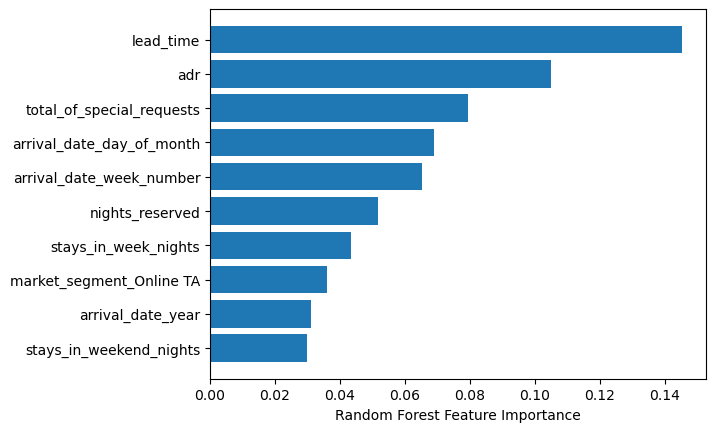

In [40]:
# NEW ADDITION AFTER MILESTONE 3
# display the top 10 most important features in the model
sorted_idx = model.feature_importances_.argsort()
sorted_idx = sorted_idx[-10:]
plt.barh(features_train.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### Overview of Results

The best model for predicting if a reservation will be canceled, as determined by utilizing a GridSearch, is a Random Forest Classifier with 10 features. The resulting accuracy of the model is about 83.8% which indicates a high level of accuracy without overfitting. The confusion matrix above shows that the model accurately predicted 300 reservations that were not canceled and 50 reservations that were canceled. 49 reservations were predicted as not being canceled that actually were, and 19 reservations were predicted to be canceled that weren't. Overall, the model is showing a high level of accuracy. However the classification report indicates that there is a low recall and precision for predicting canceled reservations.